In [1]:
%run "simulation_function.ipynb"

In [2]:
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
import pandas as pd

In [3]:
numcores = multiprocessing.cpu_count() - 2
numcores

8

In [4]:
I0Es =  np.linspace(0, 2.5, 40) #
I0Es = 1*[round(I0Es[i],3) for i in range(len(I0Es))]
I0Es

[0.0,
 0.064,
 0.128,
 0.192,
 0.256,
 0.321,
 0.385,
 0.449,
 0.513,
 0.577,
 0.641,
 0.705,
 0.769,
 0.833,
 0.897,
 0.962,
 1.026,
 1.09,
 1.154,
 1.218,
 1.282,
 1.346,
 1.41,
 1.474,
 1.538,
 1.603,
 1.667,
 1.731,
 1.795,
 1.859,
 1.923,
 1.987,
 2.051,
 2.115,
 2.179,
 2.244,
 2.308,
 2.372,
 2.436,
 2.5]

In [5]:
outputs_bump = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=3000, targ_onset = 50,
           dist_onset=155000, presentation_period=400,
           separation=16, plots=False, sigE=0.7, I0E=i_t ) for i_t in I0Es) 



In [6]:
outputs_alone = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=3000, targ_onset = 15000,
           dist_onset=155000, presentation_period=400,
           separation=16, plots=False, sigE=0.7, I0E=i_t ) for i_t in I0Es) 

In [9]:
dfb = pd.DataFrame(outputs_bump)
dfb.columns=['rE', 'I0E']
dfb['stim']='one'

dfa = pd.DataFrame(outputs_alone)
dfa.columns=['rE', 'I0E']
dfa['stim']='alone'

df=pd.concat([dfa, dfb])

df

,rE,I0E,stim
0,[0.2333063005885443],0.000,alone
1,[0.2959834996738732],0.064,alone
2,[0.3332266905720065],0.128,alone
3,[0.2462246498009394],0.192,alone
4,[0.26605472550556813],0.256,alone
5,[0.26793758360291764],0.321,alone
6,[0.2294067393260956],0.385,alone
7,[0.3491145428538583],0.449,alone
8,[0.33459189570052006],0.513,alone
9,[0.31526334752886537],0.577,alone


TypeError: unhashable type: 'numpy.ndarray'

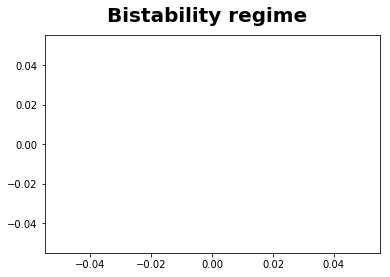

In [7]:
dfb = pd.DataFrame(outputs_bump)
dfb.columns=['rE', 'I0E']
dfb['stim']='one'

dfa = pd.DataFrame(outputs_alone)
dfa.columns=['rE', 'I0E']
dfa['stim']='alone'


df=pd.concat([dfa, dfb])

## plot
fig = plt.figure()
fig.set_size_inches(6, 4)
fig.tight_layout()
fig.suptitle('Bistability regime', fontsize=20, x=0.5, weight='demibold')
ax1 = fig.add_subplot(111)
sns.lineplot(ax= ax1, x="I0E", y="rE", hue='stim', data=df)
sns.set_style('white')
plt.xlabel('I0E', fontsize=16)
plt.ylabel('rE', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show(block=False)


df.to_excel('bistability_10.xlsx')